# __Portfolio Selection:__ 
    1. Hierarchical Risk Parity (HRP)
    2. Hierarchical Equal Risk Contribution (HERC)
    3. Best Constant Rebalanced Portfolio (BCRP)
    4. Best Stock Portfolio Strategy
    5. Buy and Hold Portfolio Strategy

In [1]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlfinlab.online_portfolio_selection.benchmarks import *
import matplotlib.patches as mpatches
from mlfinlab.portfolio_optimization.herc import HierarchicalEqualRiskContribution
from mlfinlab.portfolio_optimization.hrp import HierarchicalRiskParity

In [2]:
#import historical stock prices data from 2015 - 2020

BBNI = pd.read_csv('BBNI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
CEKA = pd.read_csv('CEKA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
DMAS = pd.read_csv('DMAS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
DVLA = pd.read_csv('DVLA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
ELSA = pd.read_csv('ELSA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
EPMT = pd.read_csv('EPMT.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
INDR = pd.read_csv('INDR.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
INDS = pd.read_csv('INDS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
IPCC = pd.read_csv('IPCC.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
LSIP = pd.read_csv('LSIP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MBAP = pd.read_csv('MBAP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MFIN = pd.read_csv('MFIN.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MFMI = pd.read_csv('MFMI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MSIN = pd.read_csv('MSIN.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
NRCA = pd.read_csv('NRCA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PBID = pd.read_csv('PBID.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PGLI = pd.read_csv('PGLI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
POWR = pd.read_csv('POWR.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PPRE = pd.read_csv('PPRE.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PTRO = pd.read_csv('PTRO.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
SCCO = pd.read_csv('SCCO.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
TPMA = pd.read_csv('TPMA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
VINS = pd.read_csv('VINS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
WSBP = pd.read_csv('WSBP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)

l = [BBNI, CEKA, DMAS, DVLA, ELSA, EPMT, INDR, INDS, IPCC, LSIP, MBAP, MFIN, MFMI, MSIN, NRCA, PBID, PGLI, POWR, PPRE, PTRO, SCCO, TPMA, VINS, WSBP]
stock_prices = pd.concat(l,keys= ['BBNI', 'CEKA', 'DMAS', 'DVLA', 
                                 'ELSA', 'EPMT', 'INDR', 'INDS',
                                 'IPCC', 'LSIP', 'MBAP', 'MFIN',
                                 'MFMI', 'MSIN', 'NRCA', 'PBID',
                                 'PGLI', 'POWR', 'PPRE', 'PTRO',
                                 'SCCO', 'TPMA', 'VINS', 'WSBP'],axis=0).reset_index()
stock_prices = stock_prices.drop(['Open', 'High', 'Low', 'Close','Volume'], axis=1)
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])
stock_prices = stock_prices.set_index('Date', drop=True)
stock_prices = stock_prices.sort_index()
stock_prices = stock_prices.pivot_table('Adj Close', ['Date'], 'level_0')
stock_prices = stock_prices.dropna(axis=0)
# stock_prices = stock_prices.resample('D').sum()


stock_prices.tail(10)

level_0,BBNI,CEKA,DMAS,DVLA,ELSA,EPMT,INDR,INDS,IPCC,LSIP,...,NRCA,PBID,PGLI,POWR,PPRE,PTRO,SCCO,TPMA,VINS,WSBP
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-13,4750.0,1980.0,180.0,2170.925049,231.789001,1850.0,2270.0,2152.173828,422.0,875.0,...,348.313202,860.0,216.0,590.0,197.0,1625.0,9350.0,326.0,112.500008,204.0
2020-07-14,4720.0,1990.0,185.0,2200.000000,231.789001,1880.0,2260.0,2142.608643,430.0,890.0,...,344.587921,875.0,226.0,590.0,195.0,1610.0,9375.0,330.0,114.000000,202.0
2020-07-15,4710.0,1980.0,195.0,2210.000000,231.789001,1850.0,2270.0,2133.043457,428.0,940.0,...,339.000000,875.0,226.0,580.0,200.0,1625.0,9375.0,338.0,107.000000,204.0
2020-07-16,4700.0,1990.0,194.0,2220.000000,231.789001,1825.0,2250.0,2056.521729,438.0,940.0,...,339.000000,870.0,250.0,590.0,200.0,1675.0,9350.0,328.0,102.000000,208.0
2020-07-17,4670.0,1995.0,200.0,2190.000000,234.000000,1870.0,2260.0,2133.043457,438.0,945.0,...,340.000000,865.0,234.0,600.0,204.0,1725.0,9600.0,324.0,98.000000,208.0
2020-07-20,4540.0,2000.0,212.0,2160.000000,226.000000,1870.0,2250.0,2190.434814,436.0,990.0,...,324.000000,880.0,218.0,600.0,202.0,1800.0,9600.0,322.0,101.000000,202.0
2020-07-21,4680.0,2000.0,216.0,2190.000000,238.000000,1875.0,2300.0,2152.173828,430.0,1005.0,...,334.000000,875.0,224.0,600.0,195.0,1790.0,9800.0,324.0,98.000000,202.0
2020-07-22,4670.0,2010.0,226.0,2260.000000,238.000000,1875.0,2260.0,2200.000000,434.0,1000.0,...,330.000000,880.0,212.0,600.0,195.0,1800.0,9750.0,324.0,98.000000,202.0
2020-07-23,4710.0,1995.0,220.0,2330.000000,238.000000,1880.0,2300.0,2200.000000,442.0,1015.0,...,324.000000,875.0,214.0,600.0,196.0,1915.0,9725.0,336.0,100.000000,204.0


In [3]:
stock_prices.columns

Index(['BBNI', 'CEKA', 'DMAS', 'DVLA', 'ELSA', 'EPMT', 'INDR', 'INDS', 'IPCC',
       'LSIP', 'MBAP', 'MFIN', 'MFMI', 'MSIN', 'NRCA', 'PBID', 'PGLI', 'POWR',
       'PPRE', 'PTRO', 'SCCO', 'TPMA', 'VINS', 'WSBP'],
      dtype='object', name='level_0')

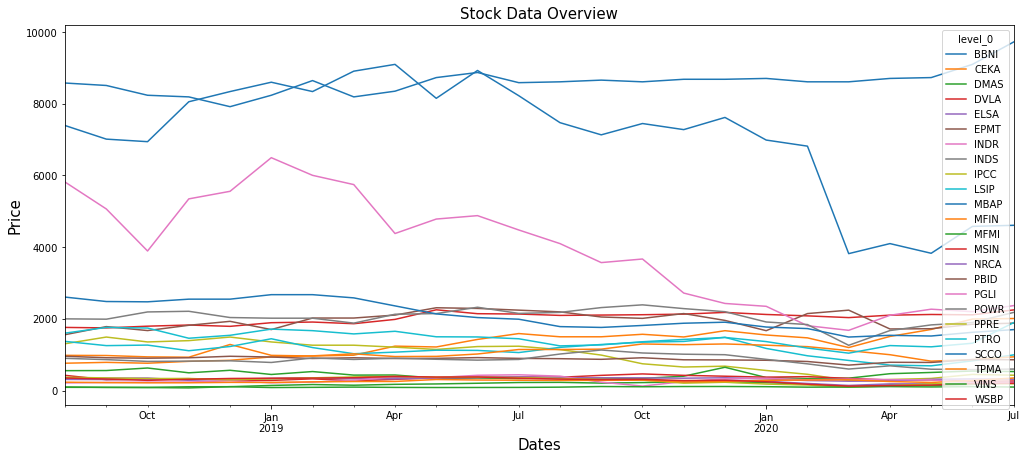

In [39]:
# Taking a quick look at the data
stock_prices.resample('M').last().plot(figsize=(17,7))
plt.ylabel('Price', size=15)
plt.xlabel('Dates', size=15)
plt.title('Stock Data Overview', size=15)
# plt.savefig('Stock Data Overview without K-Means Clustering.png')
plt.show()

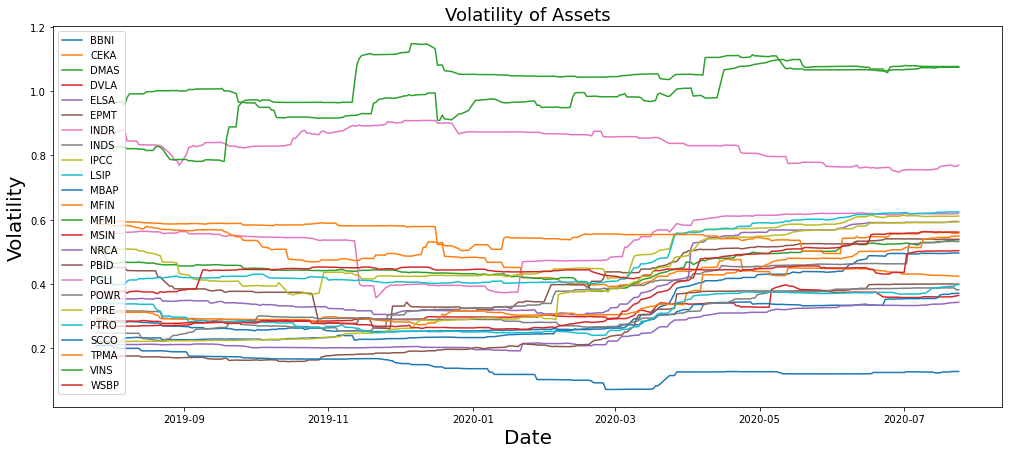

In [40]:
# plotting the volatility of our stocks
volatility = stock_prices.pct_change().rolling(window=252).std()*(252**0.5)

plt.figure(figsize=(17,7))
plt.plot(volatility)
plt.ylabel('Volatility', size=20)
plt.xlabel('Date', size=20)
plt.title('Volatility of Assets', size=18)
plt.legend(stock_prices.columns, loc='upper left')
# plt.savefig('Volatility of Assets without K-Means Clustering.png')
plt.show()

In [6]:
# Calculate Annualized Mean Historical Returns
from mlfinlab.portfolio_optimization import ReturnsEstimators

In [7]:
ret_est = ReturnsEstimators()
assets_annual_returns = ret_est.calculate_mean_historical_returns(stock_prices, frequency=252)
assets_annual_returns

level_0
BBNI   -0.174199
CEKA    0.541828
DMAS    0.621634
DVLA    0.169671
ELSA   -0.101428
EPMT    0.160399
INDR   -0.330547
INDS    0.153102
IPCC   -0.457777
LSIP    0.012809
MBAP   -0.189301
MFIN    0.142260
MFMI    0.493814
MSIN   -0.168814
NRCA    0.055447
PBID   -0.017529
PGLI    0.425211
POWR   -0.152345
PPRE   -0.252244
PTRO    0.159253
SCCO    0.051005
TPMA    0.309216
VINS    0.368531
WSBP   -0.209307
dtype: float64


##### We use `Hierarchical Equal Risk Contribution` algorithm first, then we compare to `Hierarchical Risk Parity` algorithm. We explain how `Hierarchical Equal Risk Contribution` works step by step.

## __Hierarchical Equal Risk Contribution__

### __Step 1:__ Hierarchical Clustering

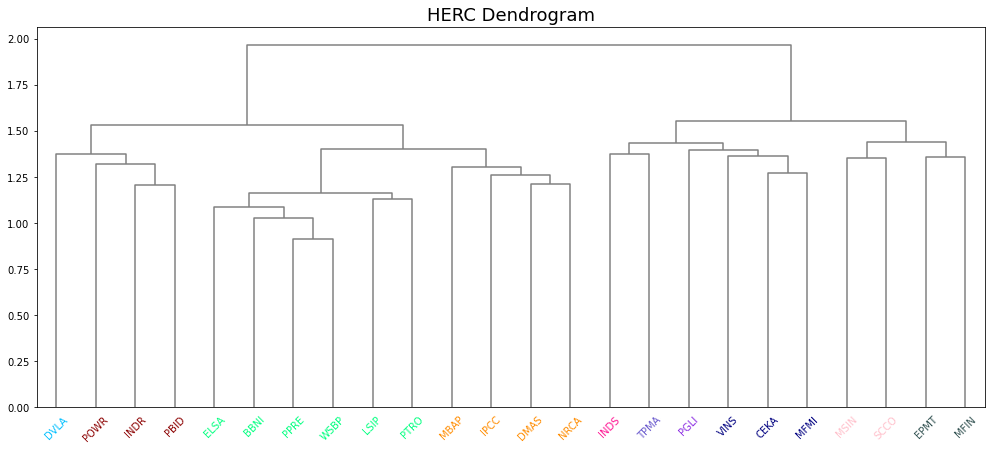

In [15]:
plt.figure(figsize=(17,7))
hercEW.plot_clusters(assets=stock_prices.columns)
plt.title('HERC Dendrogram', size=18)
plt.xticks(rotation=45)
# plt.savefig('HERC Dendrogam without K-Means Clustering using Equal weighting as Risk Measure.png')
plt.show()

### __Step 2:__ Selection the Optimal Number of Clusters

In [11]:
print('The optimal number of clusters is: ' + str(hercEW.optimal_num_clusters))

The optimal number of clusters is: 10


### __Step 3:__ Top Down Recursive Bisection

#### __A. HERC Portfolio with `Equal Weighting` as Risk Measure__

In [8]:
# building our equal_weighting HERC portfolio
hercEW = HierarchicalEqualRiskContribution()
hercEW.allocate(asset_names=stock_prices.columns,
                asset_prices=stock_prices,
                optimal_num_clusters=10,
                risk_measure='equal_weighting')
hercEW_weights = hercEW.weights
hercEW_weights

level_0,DVLA,POWR,INDR,PBID,ELSA,BBNI,PPRE,WSBP,LSIP,PTRO,...,INDS,TPMA,PGLI,VINS,CEKA,MFMI,MSIN,SCCO,EPMT,MFIN
0,0.125,0.041667,0.041667,0.041667,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,...,0.0625,0.0625,0.0625,0.020833,0.020833,0.020833,0.0625,0.0625,0.0625,0.0625


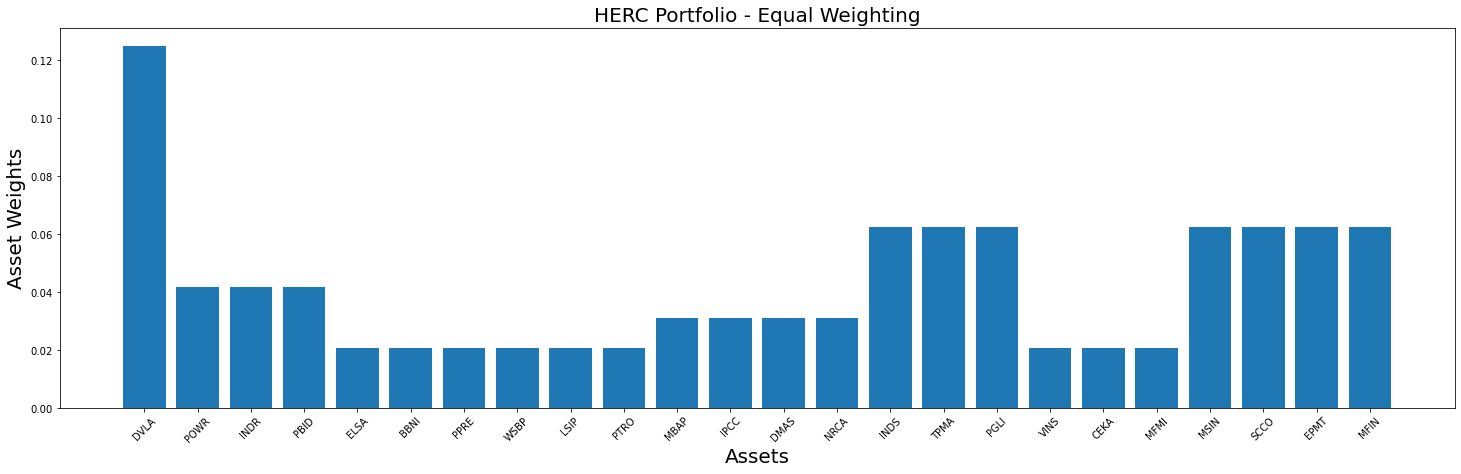

In [16]:
# plotting our optimal portfolio
y_pos = np.arange(len(hercEW_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hercEW_weights.columns), hercEW_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HERC Portfolio - Equal Weighting', size=20)
# plt.savefig('HERC Barplot without K-Means Clustering using Equal Weighting as Risk Measure.png')
plt.show()

#### __B. HERC Portfolio with `Variance` as Risk Measure__

In [12]:
# building our variance HERC portfolio
hercMV_variance = HierarchicalEqualRiskContribution()
hercMV_variance.allocate(asset_names=stock_prices.columns,
                asset_prices=stock_prices,
                optimal_num_clusters=10,
                risk_measure='variance')
herc_MV_variance = hercMV_variance.weights
herc_MV_variance.T

,0
level_0,
DVLA,0.148930
POWR,0.106682
INDR,0.031678
PBID,0.116460
ELSA,0.019759
BBNI,0.028351
PPRE,0.023513
WSBP,0.023767
LSIP,0.016655


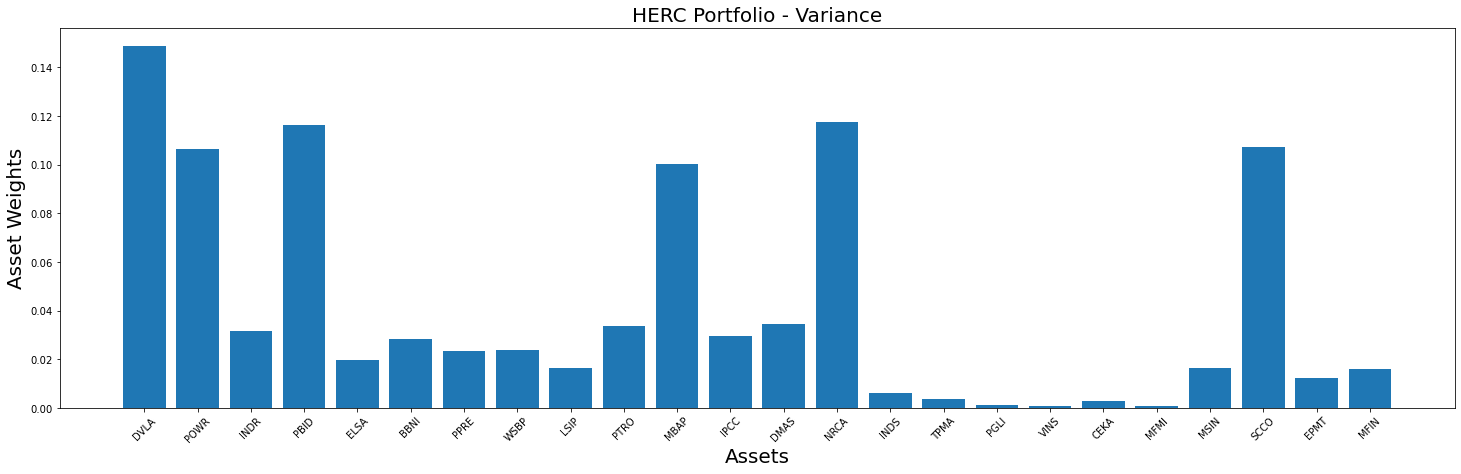

In [17]:
# plotting our optimal portfolio
y_pos = np.arange(len(herc_MV_variance.columns))

plt.figure(figsize=(25,7))
plt.bar(list(herc_MV_variance.columns), herc_MV_variance.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HERC Portfolio - Variance', size=20)
# plt.savefig('HERC Barplot without K-Means Clustering using Variance as Risk Measure.png')
plt.show()

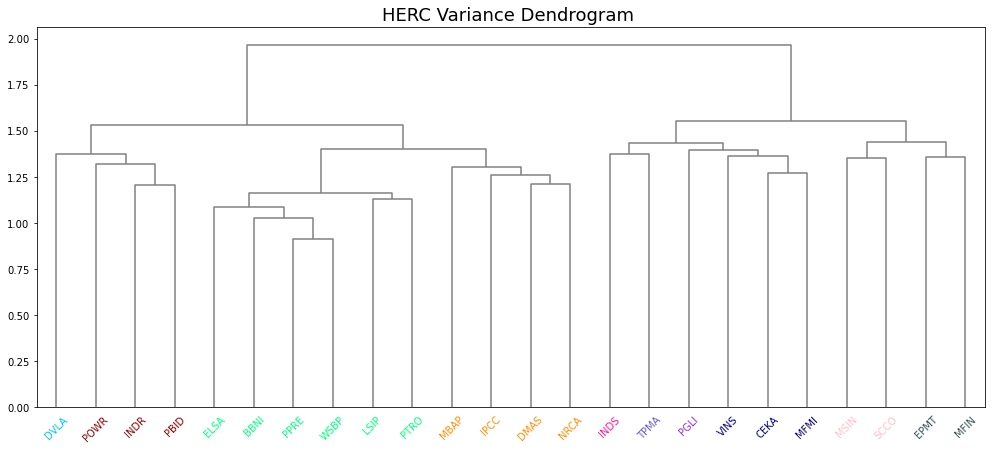

In [18]:
plt.figure(figsize=(17,7))
hercMV_variance.plot_clusters(assets=stock_prices.columns)
plt.title('HERC Variance Dendrogram ', size=18)
plt.xticks(rotation=45)
# plt.savefig('HERC Dendogram without K-Means Clustering using Variance as Risk Measure.png')
plt.show()

<hr>

#### After we build our `HERC` portfolio, we proceed to build our `HRP` Portfolio. So, we can compare what differences between `HRP` and `HERC` portfolio.
#### However, first we explain how `Hierarchical Risk Parity` algorithm works based on literature we studied
## __Hierarchical Risk Parity__

In [19]:
# building our HRP portfolio
hrp = HierarchicalRiskParity()
hrp.allocate(asset_names=stock_prices.columns,
             asset_prices=stock_prices,
            linkage = 'ward')
hrp.weights

level_0,DVLA,POWR,INDR,PBID,ELSA,BBNI,PPRE,WSBP,LSIP,PTRO,...,INDS,TPMA,PGLI,VINS,CEKA,MFMI,MSIN,SCCO,EPMT,MFIN
0,0.046618,0.041607,0.012355,0.041213,0.011699,0.016787,0.015969,0.011371,0.007969,0.027128,...,0.040907,0.029697,0.013869,0.010045,0.034912,0.008935,0.047595,0.323365,0.035302,0.046314


### __Step 1:__ Hierarchical Clustering

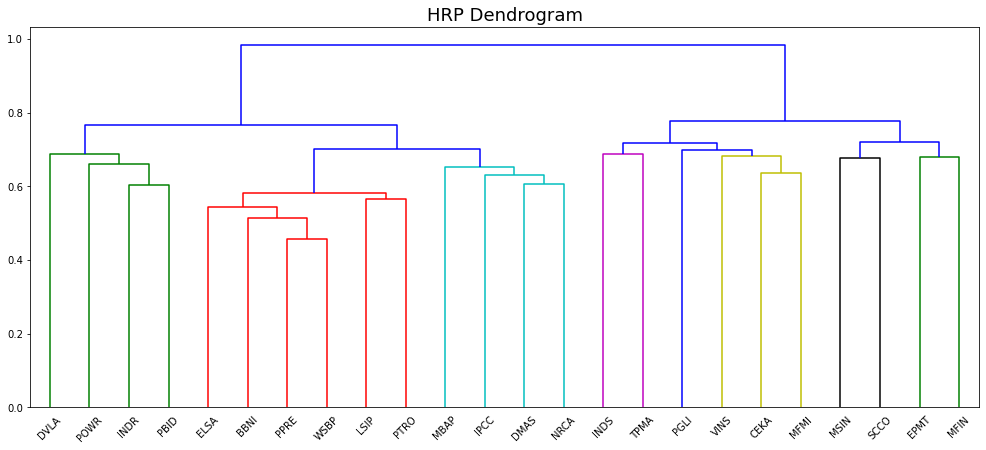

In [20]:
# plotting dendrogram of HRP portfolio
plt.figure(figsize=(17,7))
hrp.plot_clusters(stock_prices.columns)
plt.title('HRP Dendrogram', size=18)
plt.xticks(rotation=45)
# plt.savefig('HRP Dendogram using Ward Linkage.png')
plt.show()

### __Step 2:__ Quasi Diagonalization

In [22]:
from mlfinlab.portfolio_optimization import ReturnsEstimators
import seaborn as sns

<Figure size 504x504 with 0 Axes>

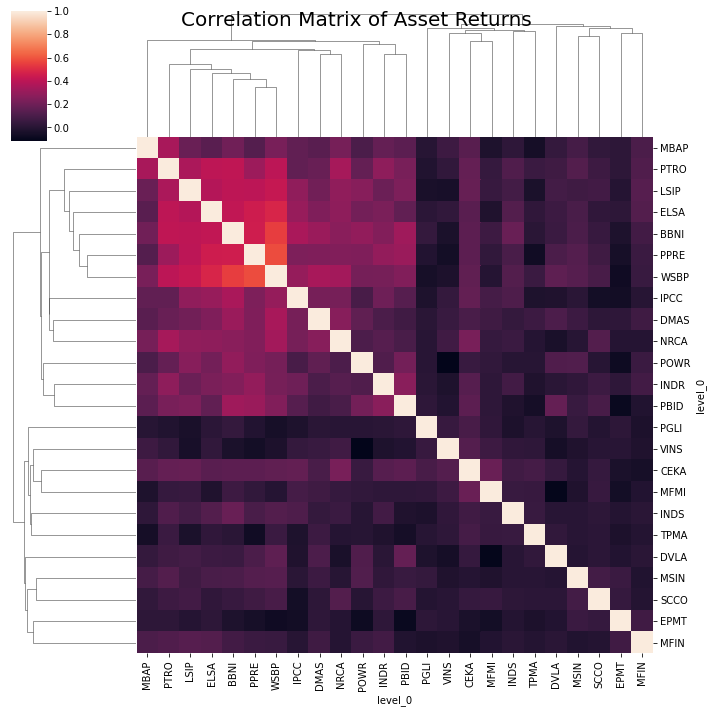

In [23]:
asset_returns = ReturnsEstimators.calculate_returns(stock_prices)
plt.figure(figsize=(7,7))
g = sns.clustermap(asset_returns.corr())
g.fig.suptitle('Correlation Matrix of Asset Returns', fontsize = 20)
# plt.savefig('HRP ward Linkage Correlation Matrix of Asset Return.png')
plt.show()

### __Step 3:__ Recursive Bisecction

#### Support Linkage Methods
For `Hierarchical Risk Parity` Algorithm, MlFinLab Library allows us to customize the type of linkage algorithm for the use of clustering. The current supported linkage methods are:

1. Single Linkage - the distance between two clusters is the minimum distance between any two points in the clusters
2. Complete Linkage - the distance between two clusters is the maximum of the distance between any two points in the clusters
3. Average Linkage - the distance between two clusters is the average of the distance between any two points in the clusters
4. Ward Linkage - the distance between two clusters is the increase of the squared error from when two clusters are merged

### __Single Linkage HRP Portfolio__

In [24]:
# constructing our Single Linkage portfolio
hrp_single = HierarchicalRiskParity()
hrp_single.allocate(asset_names=stock_prices.columns,
                    asset_prices=stock_prices,
                    linkage='single')

print("HRP Portfolio Weights - Single Linkage \n", hrp_single.weights)

HRP Portfolio Weights - Single Linkage 
 level_0      EPMT      TPMA   PGLI      SCCO      VINS      MFIN      MSIN  \
0        0.039496  0.030684  0.015  0.333533  0.010979  0.052206  0.046425   

level_0      DVLA      INDS      MFMI  ...      NRCA      DMAS      MBAP  \
0        0.088959  0.046495  0.008212  ...  0.044677  0.014321  0.036628   

level_0     IPCC      PTRO      LSIP      ELSA      BBNI      PPRE      WSBP  
0        0.01086  0.018528  0.006594  0.007823  0.014621  0.007656  0.007738  

[1 rows x 24 columns]


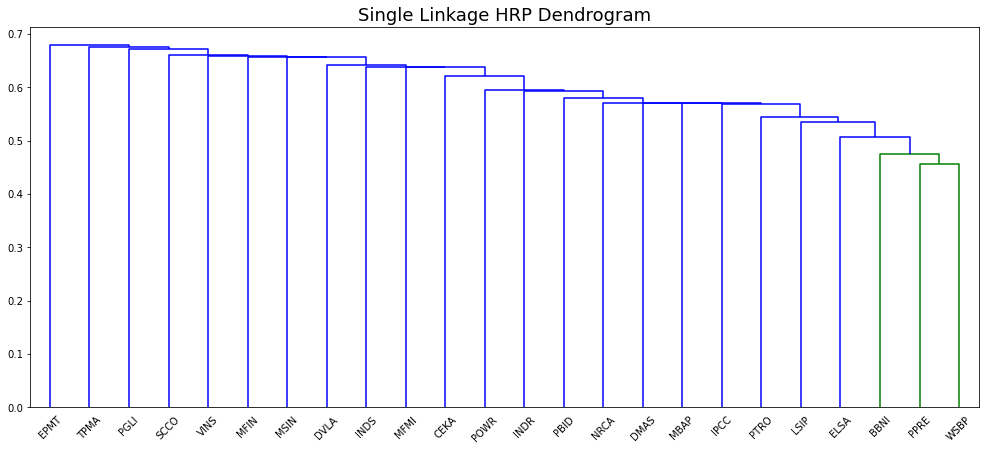

In [25]:
# plotting dendrogram of Single Linkage HRP portfolio
plt.figure(figsize=(17,7))
hrp_single.plot_clusters(stock_prices.columns)
plt.title('Single Linkage HRP Dendrogram', size=18)
plt.xticks(rotation=45)
# plt.savefig('HRP Single Linkage Dendogram.png')
plt.show()

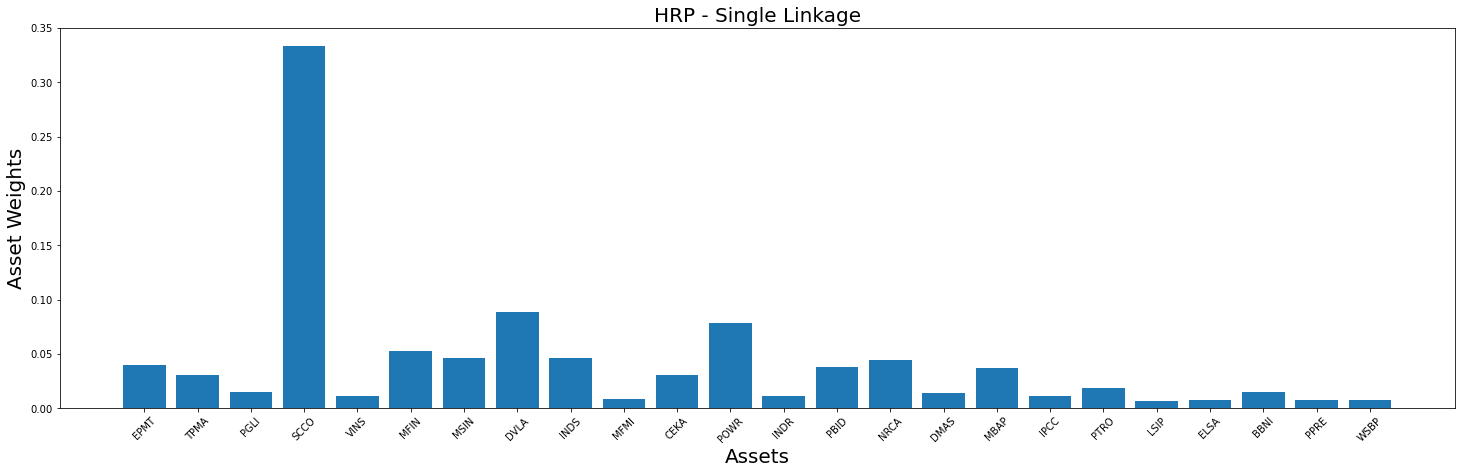

In [26]:
# plotting our optimal portfolio
hrp_single_weights = hrp_single.weights
y_pos = np.arange(len(hrp_single_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hrp_single_weights.columns), hrp_single_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HRP - Single Linkage', size=20)
# plt.savefig('HRP Barplot Single Linkage without K-Means Clustering.png')
plt.show()

### __Complete Linkage HRP Portfolio__

In [28]:
# constructing our Complete Linkage portfolio
hrp_complete = HierarchicalRiskParity()
hrp_complete.allocate(asset_names=stock_prices.columns,
                      asset_prices=stock_prices,
                      linkage='complete')

print("HRP Portfolio Weights - Complete Linkage \n", hrp_complete.weights)

HRP Portfolio Weights - Complete Linkage 
 level_0      PGLI      VINS      CEKA      MFMI    MSIN      POWR      DMAS  \
0        0.011689  0.007638  0.026757  0.008074  0.0385  0.072793  0.017181   

level_0     NRCA      IPCC      LSIP  ...      MBAP      PTRO      INDR  \
0        0.04973  0.012611  0.014603  ...  0.041069  0.034687  0.011272   

level_0      PBID      EPMT      MFIN      DVLA      SCCO      INDS      TPMA  
0        0.041438  0.035123  0.045548  0.086966  0.301417  0.044033  0.026208  

[1 rows x 24 columns]


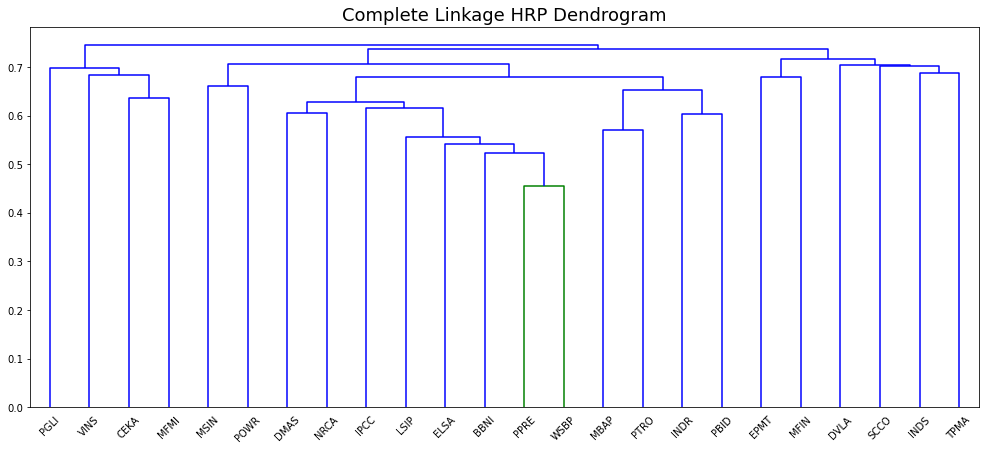

In [29]:
# plotting dendrogram of Complete Linkage HRP portfolio
plt.figure(figsize=(17,7))
hrp_complete.plot_clusters(stock_prices.columns)
plt.title('Complete Linkage HRP Dendrogram', size=18)
plt.xticks(rotation=45)
# plt.savefig('HRP Dendogram Complete Linkage without K-Means Clustering.png')
plt.show()

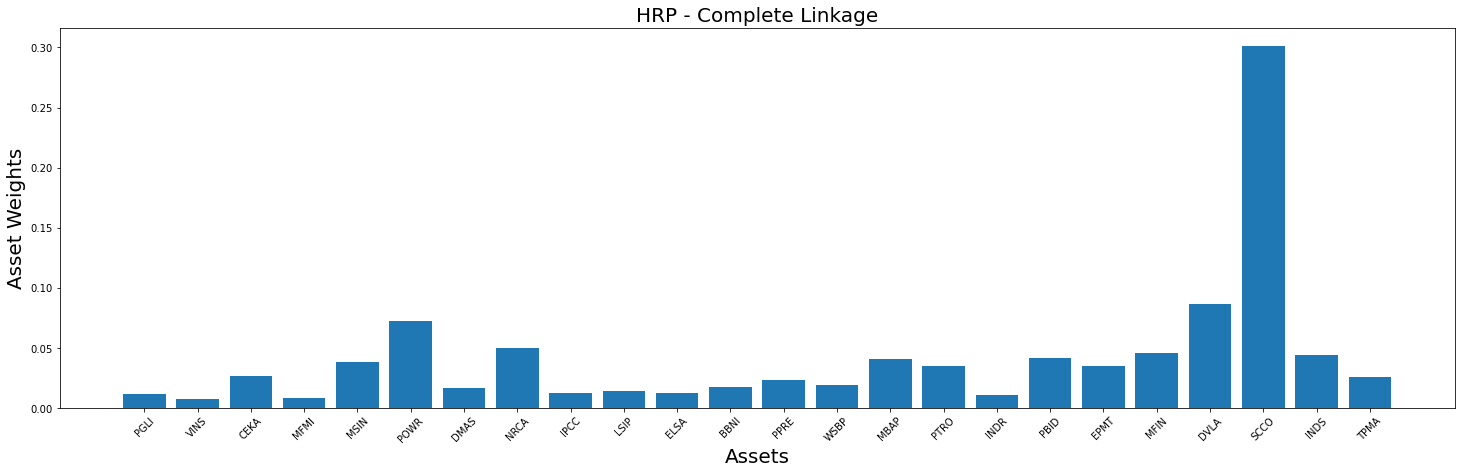

In [30]:
# plotting our optimal portfolio
hrp_complete_weights = hrp_complete.weights
y_pos = np.arange(len(hrp_complete_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hrp_complete_weights.columns), hrp_complete_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HRP - Complete Linkage', size=20)
# plt.savefig('HRP Barplot without K-Means Clustering Complete Linkage.png')
plt.show()

### __Average Linkage HRP Portfolio__

In [31]:
# constructing our Average Linkage portfolio
hrp_average = HierarchicalRiskParity()
hrp_average.allocate(asset_names=stock_prices.columns,
                     asset_prices=stock_prices,
                     linkage='average')

print("HRP Portfolio Weights - Average Linkage \n", hrp_average.weights)

HRP Portfolio Weights - Average Linkage 
 level_0      EPMT      MFIN      MSIN     SCCO      DVLA      INDS      POWR  \
0        0.033385  0.044502  0.044099  0.30276  0.088556  0.046285  0.059391   

level_0      MBAP      INDR      PBID  ...      LSIP      ELSA      BBNI  \
0        0.057803  0.015449  0.064624  ...  0.009412  0.014593  0.014421   

level_0     PPRE      WSBP     TPMA      PGLI      VINS      CEKA     MFMI  
0        0.01196  0.033253  0.02004  0.009796  0.006571  0.019998  0.00505  

[1 rows x 24 columns]


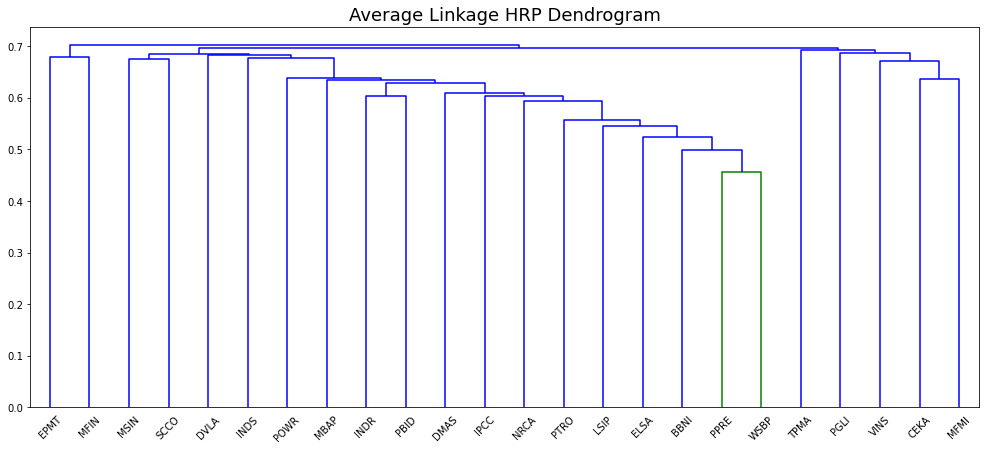

In [32]:
# plotting dendrogram of Average Linkage HRP portfolio
plt.figure(figsize=(17,7))
hrp_average.plot_clusters(stock_prices.columns)
plt.title('Average Linkage HRP Dendrogram', size=18)
plt.xticks(rotation=45)
# plt.savefig('HRP Dendogram Average Linkage without K-Means Clustering.png')
plt.show()

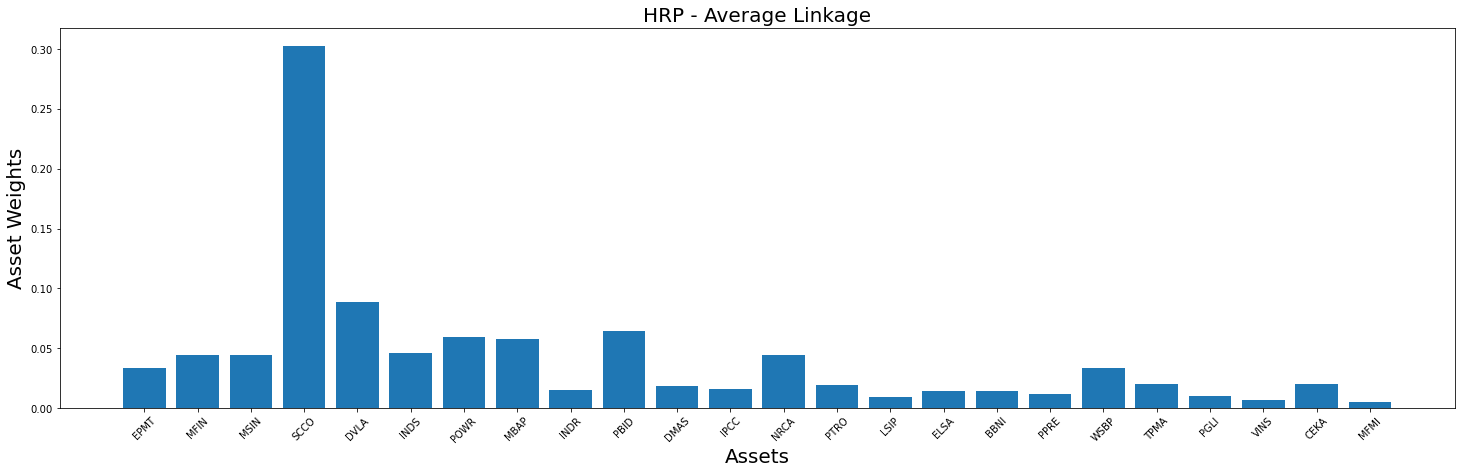

In [33]:
# plotting our optimal portfolio
hrp_average_weights = hrp_average.weights
y_pos = np.arange(len(hrp_average_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hrp_average_weights.columns), hrp_average_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HRP - Average Linkage', size=20)
# plt.savefig('HRP Barplot without K-Means Clustering Average Linkage.png')
plt.show()

### __Ward Linkage HRP Portfolio__

In [34]:
# constructing our Ward Linkage portfolio
hrp_ward = HierarchicalRiskParity()
hrp_ward.allocate(asset_names=stock_prices.columns,
                  asset_prices=stock_prices,
                  linkage='ward')

print("HRP Portfolio Weights - Ward Linkage \n", hrp_ward.weights)

HRP Portfolio Weights - Ward Linkage 
 level_0      DVLA      POWR      INDR      PBID      ELSA      BBNI      PPRE  \
0        0.046618  0.041607  0.012355  0.041213  0.011699  0.016787  0.015969   

level_0      WSBP      LSIP      PTRO  ...      INDS      TPMA      PGLI  \
0        0.011371  0.007969  0.027128  ...  0.040907  0.029697  0.013869   

level_0      VINS      CEKA      MFMI      MSIN      SCCO      EPMT      MFIN  
0        0.010045  0.034912  0.008935  0.047595  0.323365  0.035302  0.046314  

[1 rows x 24 columns]


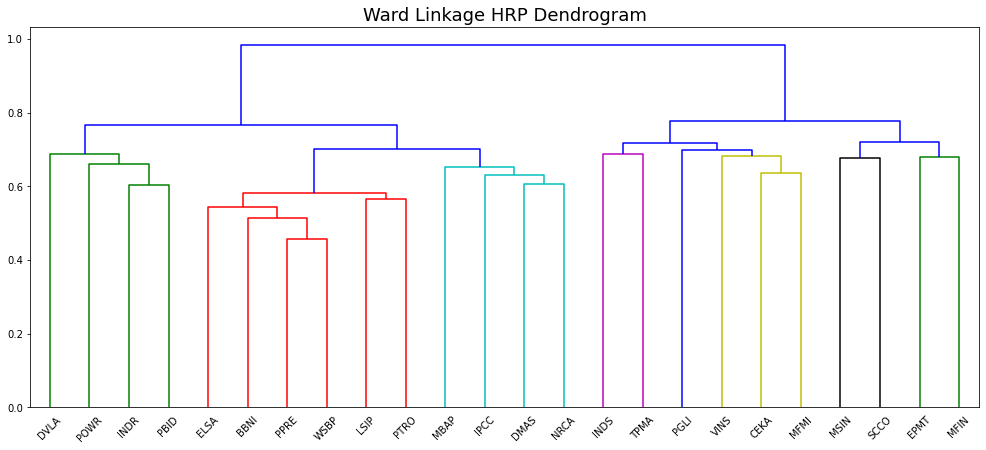

In [35]:
# plotting dendrogram of Ward Linkage HRP portfolio
plt.figure(figsize=(17,7))
hrp.plot_clusters(stock_prices.columns)
plt.title('Ward Linkage HRP Dendrogram', size=18)
plt.xticks(rotation=45)
# plt.savefig('HRP Dendogram without KMeans Clustering Ward Linkage.png')
plt.show()

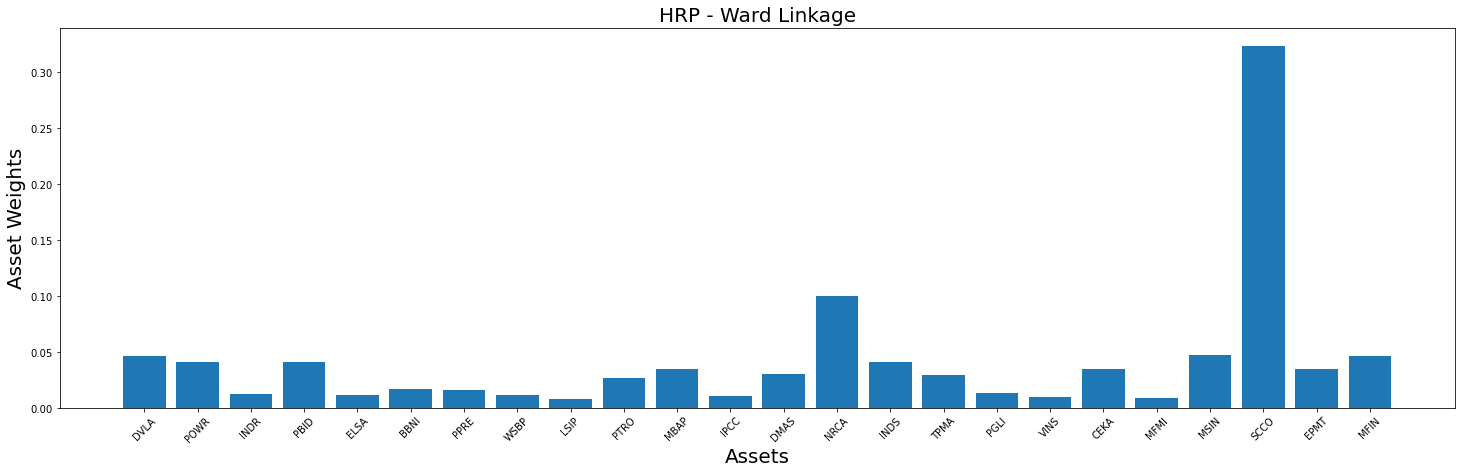

In [36]:
# plotting our optimal portfolio
hrp_ward_weights = hrp_ward.weights
y_pos = np.arange(len(hrp_ward_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hrp_ward_weights.columns), hrp_ward_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HRP - Ward Linkage', size=20)
# plt.savefig('HRP Barplot without K-Means Clustering Ward Linkage.png')
plt.show()

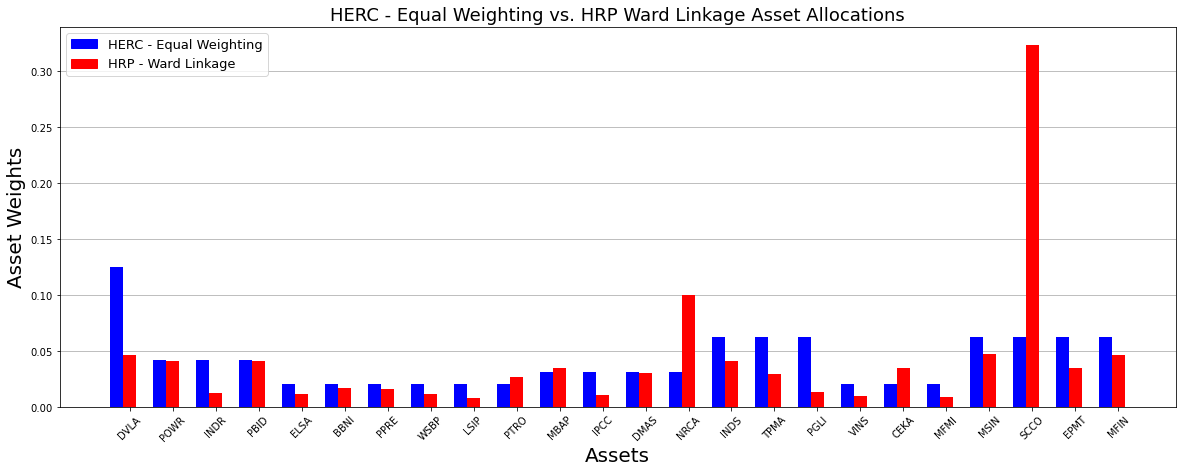

In [37]:
# plotting our HERC (Equal Weighting) vs. HRP comparison graph
hercEW_weights = hercEW_weights[hrp_ward_weights.columns]

x = np.arange(len(hrp_ward_weights.columns))
bar_width = 0.3

plt.figure(figsize=(20,7))
plt.bar(x, hercEW_weights.values[0], color='blue', width=bar_width, zorder=2)
plt.bar(x + bar_width, hrp_ward_weights.values[0], color='red', width=bar_width, zorder=2)

plt.xticks(x + bar_width, hercEW_weights, rotation=45, size=10)
plt.title('HERC - Equal Weighting vs. HRP Ward Linkage Asset Allocations', size=18)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)

blue_patch = mpatches.Patch(color='blue', label='HERC - Equal Weighting')
red_patch = mpatches.Patch(color='red', label='HRP - Ward Linkage')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', prop={'size': 13})

plt.grid(axis='y')
# plt.savefig('Barplot Difference HERC EW vs HRP Ward Linkage without K-Means Clustering.png')
plt.show()

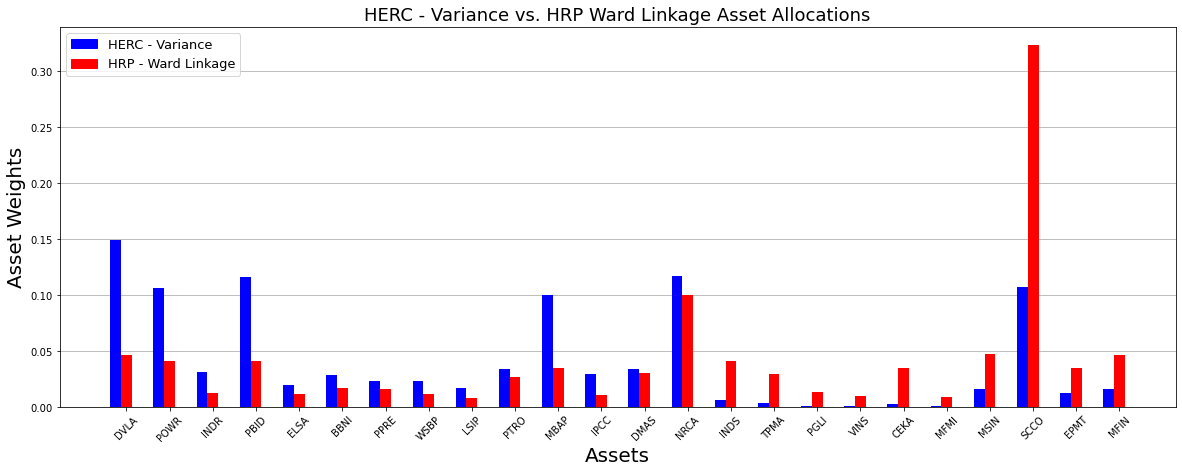

In [38]:
# plotting our HERC (Variance) vs. HRP comparison graph
herc_MV_variance = herc_MV_variance[hrp_ward_weights.columns]

x = np.arange(len(hrp_ward_weights.columns))
bar_width = 0.25

plt.figure(figsize=(20,7))
plt.bar(x, herc_MV_variance.values[0], color='blue', width=bar_width, zorder=2)
plt.bar(x + bar_width, hrp_ward_weights.values[0], color='red', width=bar_width, zorder=2)

plt.xticks(x + bar_width, herc_MV_variance, rotation=45, size=10)
plt.title('HERC - Variance vs. HRP Ward Linkage Asset Allocations', size=18)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)

blue_patch = mpatches.Patch(color='blue', label='HERC - Variance')
red_patch = mpatches.Patch(color='red', label='HRP - Ward Linkage')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', prop={'size': 13})

plt.grid(axis='y')
# plt.savefig('Barplot Difference HERC Variance vs HRP Ward Linkage without K-Means Clustering.png')
plt.show()

## Best Constant Rebalanced Portfolio Strategy

In [100]:
bcrp = BCRP()
bcrp.allocate(stock_prices)

In [101]:
print(bcrp.all_weights.iloc[0])
bcrp.all_weights.iloc[[0,-1]]

level_0
BBNI    0.002182
CEKA    0.315824
DMAS    0.636054
DVLA    0.002183
ELSA    0.002187
EPMT    0.002198
INDR    0.002194
INDS    0.002193
IPCC    0.002176
LSIP    0.002185
MBAP    0.002184
MFIN    0.002200
MFMI    0.002181
MSIN    0.002197
NRCA    0.002174
PBID    0.002190
PGLI    0.002197
POWR    0.002188
PPRE    0.002185
PTRO    0.002189
SCCO    0.002190
TPMA    0.002184
VINS    0.002188
WSBP    0.002177
Name: 2018-08-08 00:00:00, dtype: float64


level_0,BBNI,CEKA,DMAS,DVLA,ELSA,EPMT,INDR,INDS,IPCC,LSIP,...,NRCA,PBID,PGLI,POWR,PPRE,PTRO,SCCO,TPMA,VINS,WSBP
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-08,0.002182,0.315824,0.636054,0.002183,0.002187,0.002198,0.002194,0.002193,0.002176,0.002185,...,0.002174,0.00219,0.002197,0.002188,0.002185,0.002189,0.00219,0.002184,0.002188,0.002177
2020-07-24,0.002182,0.315824,0.636054,0.002183,0.002187,0.002198,0.002194,0.002193,0.002176,0.002185,...,0.002174,0.00219,0.002197,0.002188,0.002185,0.002189,0.00219,0.002184,0.002188,0.002177


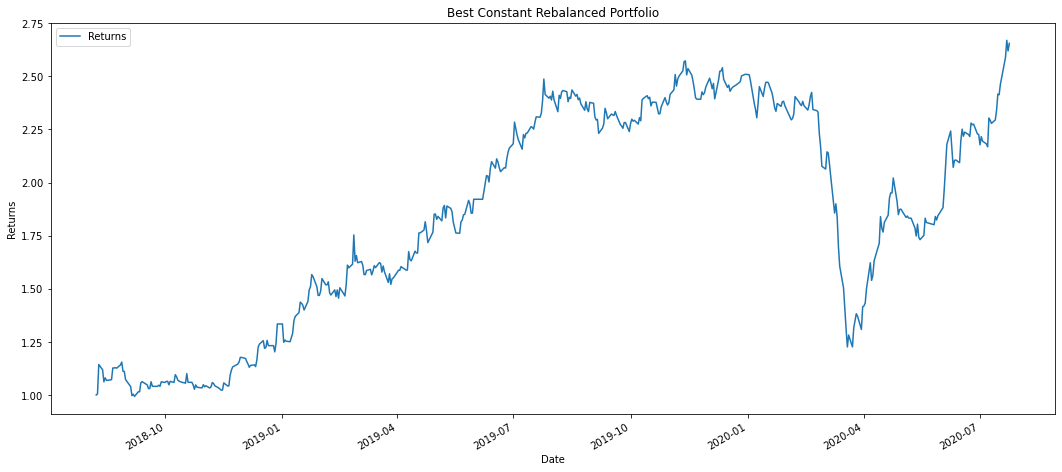

In [102]:
bcrp.portfolio_return.plot(title='Best Constant Rebalanced Portfolio', figsize=(18,8)).set_ylabel('Returns')

In [103]:
monthly_bcrp = BCRP()
# 'M' represents monthly rebalancing
monthly_bcrp.allocate(stock_prices, resample_by='M')
print(monthly_bcrp.all_weights.iloc[0])

level_0
BBNI    0.000000
CEKA    0.155199
DMAS    0.741326
DVLA    0.000000
ELSA    0.000000
EPMT    0.000000
INDR    0.000000
INDS    0.000000
IPCC    0.000000
LSIP    0.000000
MBAP    0.000000
MFIN    0.000000
MFMI    0.000000
MSIN    0.000000
NRCA    0.000000
PBID    0.000000
PGLI    0.103475
POWR    0.000000
PPRE    0.000000
PTRO    0.000000
SCCO    0.000000
TPMA    0.000000
VINS    0.000000
WSBP    0.000000
Name: 2018-08-31 00:00:00, dtype: float64


## __Buy and Hold__

In [104]:
bah = BAH()
bah.allocate(asset_prices=stock_prices, resample_by='M', verbose=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [105]:
print(bah.all_weights.iloc[0])
bah.all_weights.iloc[[0,-1]]

level_0
BBNI    0.041667
CEKA    0.041667
DMAS    0.041667
DVLA    0.041667
ELSA    0.041667
EPMT    0.041667
INDR    0.041667
INDS    0.041667
IPCC    0.041667
LSIP    0.041667
MBAP    0.041667
MFIN    0.041667
MFMI    0.041667
MSIN    0.041667
NRCA    0.041667
PBID    0.041667
PGLI    0.041667
POWR    0.041667
PPRE    0.041667
PTRO    0.041667
SCCO    0.041667
TPMA    0.041667
VINS    0.041667
WSBP    0.041667
Name: 2018-08-31 00:00:00, dtype: float64


level_0,BBNI,CEKA,DMAS,DVLA,ELSA,EPMT,INDR,INDS,IPCC,LSIP,...,NRCA,PBID,PGLI,POWR,PPRE,PTRO,SCCO,TPMA,VINS,WSBP
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-31,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,...,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667
2020-07-31,0.028052,0.091999,0.086521,0.054317,0.028172,0.053748,0.017128,0.042983,0.015603,0.027405,...,0.047386,0.040955,0.046790,0.029463,0.023182,0.037319,0.048032,0.054299,0.049856,0.025396


In [106]:
print(bah.weights)

[0.02597897 0.08528176 0.10367194 0.05322146 0.02902261 0.05025359
 0.0169769  0.0454064  0.01365424 0.03022749 0.02716426 0.05135825
 0.03980385 0.02611765 0.042509   0.0374633  0.04500692 0.02780344
 0.02132899 0.04929253 0.04722846 0.06244842 0.04131367 0.02408095]


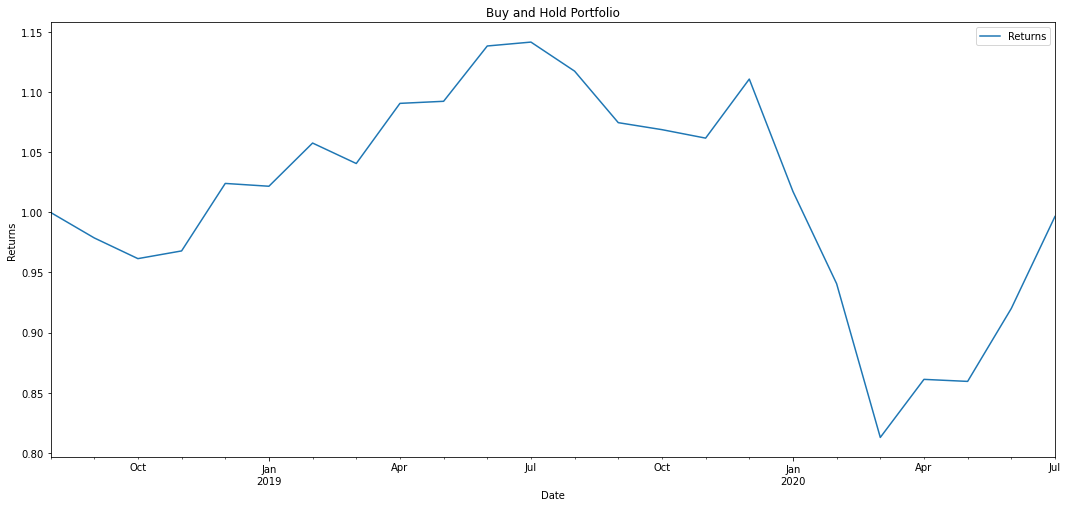

In [107]:
bah.portfolio_return.plot(title='Buy and Hold Portfolio', figsize=(18,8)).set_ylabel('Returns');

## __Best Stock Portfolio Strategy__

In [108]:
beststock = BestStock()
beststock.allocate(asset_prices=stock_prices)

In [109]:
print(beststock.all_weights.iloc[0])
beststock.all_weights.iloc[[0,-1]]

level_0
BBNI    0.0
CEKA    0.0
DMAS    1.0
DVLA    0.0
ELSA    0.0
EPMT    0.0
INDR    0.0
INDS    0.0
IPCC    0.0
LSIP    0.0
MBAP    0.0
MFIN    0.0
MFMI    0.0
MSIN    0.0
NRCA    0.0
PBID    0.0
PGLI    0.0
POWR    0.0
PPRE    0.0
PTRO    0.0
SCCO    0.0
TPMA    0.0
VINS    0.0
WSBP    0.0
Name: 2018-08-08 00:00:00, dtype: float64


level_0,BBNI,CEKA,DMAS,DVLA,ELSA,EPMT,INDR,INDS,IPCC,LSIP,...,NRCA,PBID,PGLI,POWR,PPRE,PTRO,SCCO,TPMA,VINS,WSBP
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-08,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


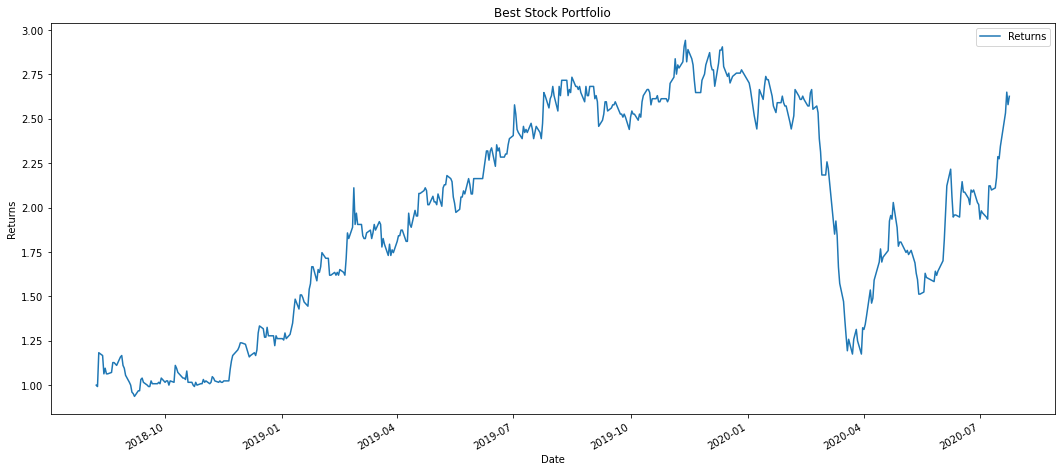

In [110]:
beststock.portfolio_return.plot(title='Best Stock Portfolio', figsize=(18,8)).set_ylabel('Returns');

## __Calculate Risk Metrics__

In [111]:
from mlfinlab.portfolio_optimization import RiskMetrics

In [112]:
risk_met = RiskMetrics()
CDar = risk_met.calculate_conditional_drawdown_risk(assets_annual_returns, 0.05)
CVar = risk_met.calculate_expected_shortfall(assets_annual_returns, 0.05)
VaR = risk_met.calculate_value_at_risk(assets_annual_returns, 0.05)

## __Calculate Backtest Statistics__

In [113]:
#calculate backtest statistics
from mlfinlab.backtest_statistics import sharpe_ratio, probabilistic_sharpe_ratio, information_ratio, minimum_track_record_length, bets_concentration, all_bets_concentration

In [114]:
sr = sharpe_ratio(assets_annual_returns, risk_free_rate=0.05)
psr = probabilistic_sharpe_ratio(sr, 1.0, 252)
information_r = information_ratio(assets_annual_returns, benchmark=0.05)
min_record_length = minimum_track_record_length(sr, 1.0)
concentration = bets_concentration(assets_annual_returns)

## __Evaluation__

In [115]:
pd.DataFrame(data = [CDar, CVar, VaR, sr, psr, information_r, min_record_length, concentration],
            index = ['Conditional Drawdown at Risk', 'Expected Shortfall', 'Variance at Risk', 'Sharpe Ratio', 'Probabilistic Sharpe Ratio', 'Information Ratio', 'Minimum Record Length', 'Bets Concentration'],
             columns = ['Score']
            )

,Score
Conditional Drawdown at Risk,1.079410
Expected Shortfall,-0.394162
Variance at Risk,-0.252244
Sharpe Ratio,0.942124
Probabilistic Sharpe Ratio,0.222700
Information Ratio,0.942124
Minimum Record Length,1167.156377
Bets Concentration,0.769090


<hr>